In [1]:
# mnist_softmax
# MNIST(Modified National Institute of Standard Technology) Dataset
# https://ko.wikipedia.org/wiki/MNIST
# label : 0 ~ 9 , 손글씨체 이미지  28*28(784 byte) , gray scale
# Train : 60000개 , Test : 10000개

# mini batch : 큰 데이터를 쪼개어 1회에 작은 단위로 가져다가 학습, next_batch()
# epoch : batch를 반복하여 전체 데이터가 모두 소진되었을 때를 1 epoch
# Vanishing Gradient  : 신경망이 깊어 질수록 입력신호가 사라진다(줄어든다), sigmoid 사용시
# Relu  : Rectified Linear Unit, DNN(deep neural net) 구현시 sigmoid 대신 사용됨
# dropout : 전체 신경망의 일부를 사용하지 않고 학습, 예측시는 전체를 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

In [2]:
# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)  = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
# t = 10,20   # packing
# a,b = t     # unpacking

<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (10000,)
5


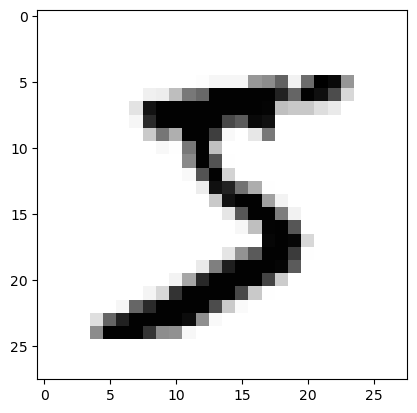

In [4]:
# 이미지로 출력
def show_one_image(n):
    print(type(x_train),x_train.shape) # (60000, 28, 28)
    print(type(y_train),y_train.shape) # (60000,)
    print(type(x_test),x_test.shape)   # (10000, 28, 28)
    print(type(y_test),y_test.shape)   # (10000,)
    
    image = x_train[n]
    print(y_train[n])
    
    plt.imshow(image,cmap='Greys')
    plt.show()

show_one_image(0)    

In [5]:
# X값의 shape을 2차원으로 변환
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# X값의 타입을 float형으로 변환
x_train = tf.cast(x_train,dtype=tf.float32)
x_test = tf.cast(x_test,dtype=tf.float32)

print(x_train.shape,x_train.dtype)
print(x_test.shape,x_test.dtype)

(60000, 784) <dtype: 'float32'>
(10000, 784) <dtype: 'float32'>


In [9]:
# one-hot 인코딩
nb_classes = 10   # class의 범주 갯수 (0~9)

Y_one_hot = tf.one_hot(y_train,nb_classes)  
print(Y_one_hot.shape)                     # (60000,10), Rank=2 (2차원) 

(60000, 10)


In [11]:
# 변수 초기화 : weight, bias
# (60000,784) * (784,10) = (60000,10)
W = tf.Variable(tf.random.normal([784,nb_classes]),name='weight')
b = tf.Variable(tf.random.normal([nb_classes]),name='bias')

In [12]:
# 예측 함수(hypothesis) : H(X) = softmax(X*W + B)
def logits(X):
    return tf.matmul(X,W) + b

def hypothesis(X):
    return tf.nn.softmax(logits(X)) 

In [13]:
#  비용함수 구현 방법 2 : tf.nn.softmax_cross_entropy_with_logits() 함수 사용
def cost_func():
    cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits(x_train),
                                                    labels=Y_one_hot)
    cost = tf.reduce_mean(cost_i)
    return cost

In [14]:
# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [18]:
# 방법 1. 전체 데이터를 한번에 학습, 비효율적이며 학습에 장시간 소요
# 학습 시작
# print('***** Start Learning!!')
# for step in range(2001):
#     optimizer.minimize(cost_func,var_list=[W,b])
#     if step % 100 == 0:
#         print('%04d'%step,'cost:[',cost_func().numpy(),']')
# print('***** Learning Finished!!') 

In [ ]:
# 방법 2. batch 사이즈로 나누어 학습, 효율적 이며 학습 시간 단축
# 학습 시작

training_epoch = 25
batch_size = 600

print('***** Start Learning!!')
for epoch in range(training_epoch):  # 25회
    
    # 100 = 60000/600
    total_batch = x_train.shape[0]/batch_size
    for k in range(total_batch):  # 100회
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size]
        
        
    
        optimizer.minimize(cost_func,var_list=[W,b])
        if step % 100 == 0:
            print('%04d'%step,'cost:[',cost_func().numpy(),']')
print('***** Learning Finished!!') 

In [19]:
x_train.shape

TensorShape([60000, 784])

In [21]:
x_train[:600]

<tf.Tensor: shape=(600, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>